<h1 align="center"> CSE 242 Assignment 4, Spring 2024

<h2 align="center"> 3 Questions, 100 pts, due: 23:59 pm, May 20th, 2024
    
    Your name:          Student ID:

## Instruction 

- Submit your assignments onto **Gradescope** by the due date. Upload a <code>zip</code> file containing:

    (1) The saved/latest <code>.ipynb</code> file, please **rename this file with your name included**.

    (2) Also save your file into a pdf version, if error appears, save an html version instead (easy to grade for written questions).
    
    **For assignment related questions, please reach TA or grader through Slack/Email.**
    
- This is an **individual** assignment. All help from others (from the web, books other than text, or people other than the TA or instructor) must be clearly acknowledged. 

## Objective 

- **Task 1:** EM algorithm (Mathematical Derivation)
- **Task 2:** K-Means implementation (Coding)
- **Task 3:** Kernel Methods with Noisy Setting (Coding)


# Question 1. (EM algorithm, 20 pts)

Derive the E-step and M-step update equations of EM algorithm for estimating the Gaussian mixture model $p(X;\theta) = ∑_{k=1}^{K} \pi_k N(x; \mu_k, \sigma_k^2)$ where $\pi_k$ is the mixture weight with $\pi_k \ge 0$  and  $∑_{k=1}^{K} \pi_k = 1$, and $\mu_k$, $\sigma^2_k$ are the mean and variance of the gaussian distribution corresponding to cluster k. 

For the E-step, first prove that $z_{ik} = {P(z_i = k | X, \mu ,\sigma, \pi)} = \dfrac {\pi_k N(x_i; \mu_k, \sigma_k^2)}{∑_{k=1}^{K} \pi_k N(x_i; \mu_k, \sigma_k^2)}$. Then, for the M-step, show the derivation to compute the updates for $(\mu_k, \pi_k)$. Note that, you don't need to show the derivation for $\sigma_k$. For each derivation step, mention the concept applied (e.g. just 2-3 keywords, e.g. formula for expectation, independence of datapoints, (f+g)' = f' + g', etc ... ). 

**Hint:** For the M-step, you need to solve for $\mu_k^t = \underset{\mu_k}{argmax} \ E_{p(Z | X, \mu^{(t-1)}, \sigma^{(t-1)}, \pi^{(t-1)})}{[\log p(X, Z | \mu, \sigma, \pi)]}$ (and similarly for $\pi_k$) by applying the first order conditions for function optimization (take derivative and set it to zero). Note that the term ${p(Z|X,\mu^{(t-1)},\sigma^{(t-1)},\pi^{(t-1)})}$ is the one computed in the E-step, and uses fixed values for $\mu, \sigma, \pi$ from the previous iteration (t-1).







In [46]:
from IPython.display import Image
# Replace the figure name
# Image(filename='sample.png') 

# Question 2. (K-Means implementation, 20 pts)

#### **Question 2.1.** Implement K-means in Python from scratch. Complete following sub-functions `update_centroids` and `update_assignments`.



In [47]:
import numpy as np

def find_nearest_centroid(x,y,centroids):
  min_distance = float('inf')
  label = -1
  i = 0
  for center in centroids:
    curr_dist = np.sqrt(np.square(center[0]-x) + np.square(center[1]-y))
    #print(curr_dist)
    if (curr_dist <= min_distance):
      min_distance = curr_dist
      label = i
    i += 1

  return label

def update_assignments(data, centroids):

  ########################
  #### YOUR CODE HERE ####

  ## you will get cluster# 
  ##assignments here #####
  ########################
  assignments = []

  for point in data:
    curr_label = find_nearest_centroid(point[0], point[1],centroids)
    assignments.append(curr_label)
  return assignments

def update_centroids(data,centroids,assignments):

  ########################
  #### YOUR CODE HERE ####
  ########################
  assignments = np.array(assignments)
  for k in range(len(centroids)):
    cluster_data = assignments == k

    x,y = data[cluster_data, 0], data[cluster_data, 1]
    #print(x.shape)
   # print(y.shape)
    centroids[k] = (np.sum(x)/len(x), np.sum(y)/len(y))  

  return centroids


def kmeans(data, centroids, max_iterations):    

    for j in range(max_iterations):
        # update cluter assignments
        assignments = update_assignments(data,centroids)    # WRITE CODE FOR update_assignments
        
        # update centroid locations
        centroids = update_centroids(data,centroids,assignments)  # WRITE CODE FOR update_centroids
        
    # final assignment update
    assignments = update_assignments(data,centroids)
    return centroids, assignments

#### **Question 2.2.** Run your code on following toy dataset for different k-values, where k = {2, 3, 4, 6, 10} and plot the cluster assignments for different k's as shown in following diagram.

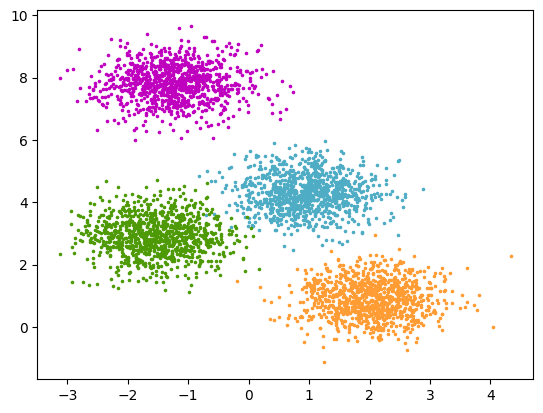

In [48]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Generate sample data
n_samples = 4000
n_components = 4

X, y_true = make_blobs(
    n_samples=n_samples, centers=n_components, cluster_std=0.60, random_state=0
)

colors = ["#4EACC5", "#FF9C34", "#4E9A06", "m"]

for k, col in enumerate(colors):
    cluster_data = y_true == k
    plt.scatter(X[cluster_data, 0], X[cluster_data, 1], c=col, marker=".", s=10)


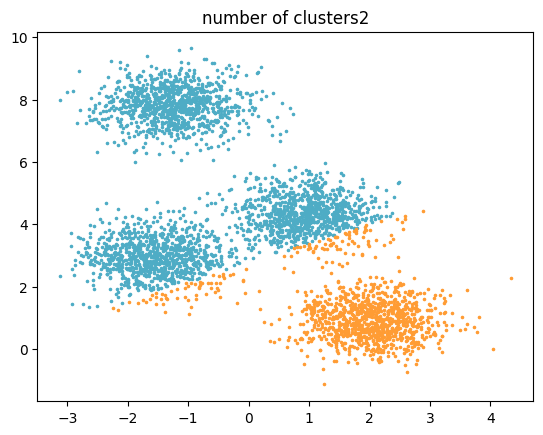

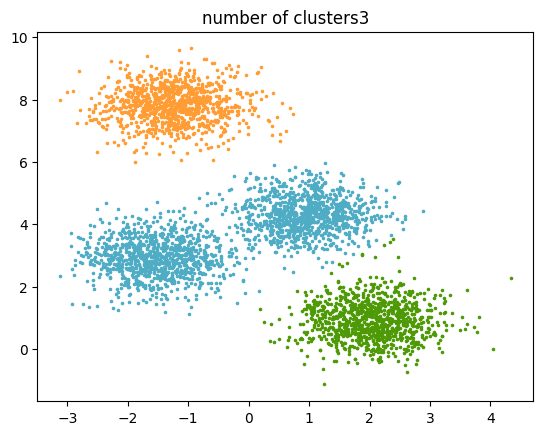

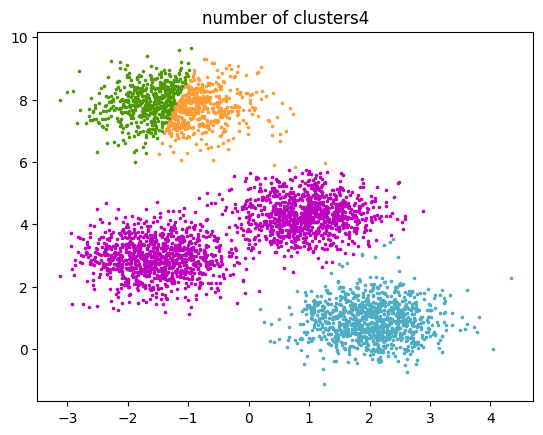

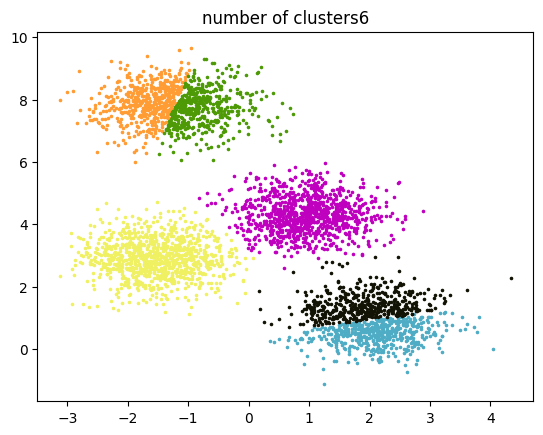

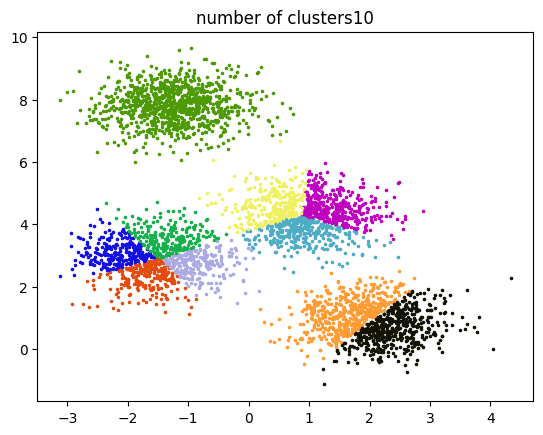

In [49]:

import numpy as np

# function to get initial cluster centroids; we randomly choose k points from the dataset 
def get_initial_clusters(k, X):
  random_indices = np.random.randint(0, X.shape[0], k)
  initial_centroids = X[random_indices]

  return initial_centroids

# your code here.
colors = ["#4EACC5", "#FF9C34", "#4E9A06", "m", "#F0F063", "#131305", "#E44C0F", "#120FE4", "#ABAAE5", "#15B04B"]
for no_clusters in [2,3,4,6,10]:
  initial_centroids = get_initial_clusters(no_clusters,X)
  centroid,assignments = kmeans(X, initial_centroids, 100)
  #print(n_clusters)
  plt.figure()
  for k, col in enumerate(colors[:no_clusters]):
      cluster_data = np.array(assignments) == k
      
      plt.scatter(X[cluster_data, 0], X[cluster_data, 1], c=col, marker=".", s=10)

      plt.title("number of clusters" + str(no_clusters))
plt.show()

  


# Question 3. (Kernel Methods with Noisy Setting, 60 pts)

**SVM on synthetic dataset generated as follows:**

- Draw $1000\ (x_0, x_1)$ feature vectors from the 2-D Gaussian distribution with mean $\mu_+ = (1,1)$ and $\Sigma_+ = [1, 0; 0, 1]$ and label them as $+1$.

- Draw $1000\ (x_0, x_1)$ feature vectors from the 2-D Gaussian distribution with mean $\mu_- = (-1,-1)$ and $\Sigma_- = [3, 0; 0, 3]$ and label them as $-1$.
    
- This gives you a $2000$ example training set. Repeat the above to draw a test set the same way.

Use a SVM package ( scikit-learn svm.SVC class) to learn SVMs with a variety of parameter settings. 

## Dataset Preparation and Visualization

(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(2000, 2)
(2000,)
(2000, 2)
(2000,)


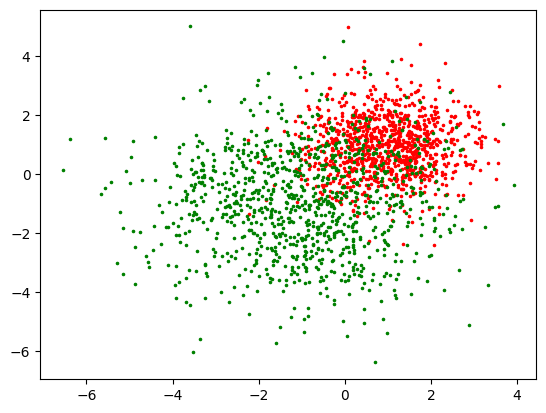

In [50]:
# Prepare Training Dataset
from sklearn.utils import shuffle
from sklearn.svm import SVC

#Feature vector set with mean = [1,1] and sigma = [[1,0], [0,1]]
mean1 = np.array([1,1])
cov1 = np.array([[1,0],[0,1]])
cluster1 = np.random.multivariate_normal(mean1, cov1, 1000)

#Feature vector set with mean = [-1,-1] and sigma = [[3,0], [0,3]]
mean2 = np.array([-1,-1])
cov2 = np.array([[3,0],[0,3]])
cluster2 = np.random.multivariate_normal(mean2, cov2, 1000)

print(cluster1.shape)
print(cluster2.shape)

X_train = np.concatenate((cluster1, cluster2))
Y_train = np.concatenate((np.array([1]*1000), np.array([-1]*1000)))


#Prepare Test Dataset

cluster1_test = np.random.multivariate_normal(mean1, cov1, 1000)
cluster2_test = np.random.multivariate_normal(mean2, cov2, 1000)

cluster1_y = np.array([1]*1000)
cluster2_y = np.array([-1]*1000)

print(cluster1_test.shape)
print(cluster2_test.shape)

X_test = np.concatenate((cluster1, cluster2))
Y_test = np.concatenate((cluster1_y, cluster2_y))

print(X_test.shape)
print(Y_test.shape)


X_test, y_test = shuffle(X_test, Y_test, random_state=0)
print(X_test.shape)
print(y_test.shape)


#Visualizing using matplotlib

plt.figure()
plt.scatter(cluster1[:,0], cluster1[:,1], c='r', marker=".", s=10)
plt.scatter(cluster2[:,0], cluster2[:,1], c='g', marker=".", s=10)
plt.show()

## (a -- 20 pts) 

- Use an RBF kernel with parameters $C=1$, $\gamma = 0.01$. 

- For each training data with +1 label, randomly flip their label to -1 with probability $\textbf{0.35}$.

- For each training data with -1 label, randomly flip their label to +1 with probability $\textbf{0.20}$.

- Train with the above noisy training examples.

- Random flipping introduces the randomness. You can repeat multiple times (e.g. 20) and then report the average accuracy on the testing dataset (clean) in the noise parameter setting. 



## Without Random Flipping

In [51]:
from sklearn.svm import SVC
model = SVC(kernel='rbf', C=1, gamma=0.01)
classifier = model.fit(X_train, Y_train)


print("Mean Accuracy of Model is : ",model.score(X_test, y_test))

Mean Accuracy of Model is :  0.8545


## With Random Flipping

In [52]:
s1 = np.random.binomial(1, 0.35,1000)
s2 = np.random.binomial(1,0.20,1000)

cluster1_y = []
cluster2_y = []

for val in s1:
    if val == 1:
        cluster1_y.append(-1)
    else:
        cluster1_y.append(1)

for val in s2:
    if val:
        cluster2_y.append(1)
    else:
        cluster2_y.append(-1)

cluster1_y = np.array(cluster1_y)
cluster2_y = np.array(cluster2_y)

Y_train = np.concatenate((cluster1_y, cluster2_y))
X_train_shuffled, y_train_shuffled = shuffle(X_train, Y_train, random_state=0)

total_score = 0
for _ in range(20):
    clf_shuffled = model.fit(X_train_shuffled, y_train_shuffled)
    test_score = model.score(X_test,y_test)
    total_score += test_score

print("Mean accuracy after 20 runs is (with random flipping of labels) is ", total_score/20)

Mean accuracy after 20 runs is (with random flipping of labels) is  0.8290000000000003


## (b -- 20 pts) Open question

- Try using **K-Nearst Neighbors** to correct wrong labels before training. 

- Then train the model with the newly processed training dataset. 

- Report the accuracy on the testing dataset in the noise parameter setting. Do you observe performance improvement?


In [53]:
from sklearn.neighbors import KNeighborsClassifier
for k in range(3,20):
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X_train_shuffled, y_train_shuffled)
    y_train_corrected = neigh.predict(X_train_shuffled)
    curr_clf = model.fit(X_train_shuffled, y_train_corrected)
    test_score = model.score(X_test,y_test)
    print("k :", k, "test accuracy:", test_score)
    

k : 3 test accuracy: 0.8565
k : 4 test accuracy: 0.5
k : 5 test accuracy: 0.8545
k : 6 test accuracy: 0.627
k : 7 test accuracy: 0.854
k : 8 test accuracy: 0.805
k : 9 test accuracy: 0.855
k : 10 test accuracy: 0.824
k : 11 test accuracy: 0.857
k : 12 test accuracy: 0.838
k : 13 test accuracy: 0.855
k : 14 test accuracy: 0.836
k : 15 test accuracy: 0.855
k : 16 test accuracy: 0.8555
k : 17 test accuracy: 0.8545
k : 18 test accuracy: 0.855
k : 19 test accuracy: 0.8565


## Observation

For the current scenario, correcting the labels with KNN seems to have give a better accuracy(0.851) when compared to both the cases of SVM where data was randomly flipped and unflipped ones . And particularly, the best accuracy is achieved when k is 9 or 11.

In [54]:
for k in range(20):
    neigh = KNeighborsClassifier(n_neighbors=11)
    neigh.fit(X_train_shuffled, y_train_shuffled)
    y_train_corrected = neigh.predict(X_train_shuffled)
    curr_clf = model.fit(X_train_shuffled, y_train_corrected)
    test_score = model.score(X_test,y_test)
    print("k :", k, "test accuracy:", test_score)
    

k : 0 test accuracy: 0.857
k : 1 test accuracy: 0.857
k : 2 test accuracy: 0.857
k : 3 test accuracy: 0.857
k : 4 test accuracy: 0.857
k : 5 test accuracy: 0.857
k : 6 test accuracy: 0.857
k : 7 test accuracy: 0.857
k : 8 test accuracy: 0.857
k : 9 test accuracy: 0.857
k : 10 test accuracy: 0.857
k : 11 test accuracy: 0.857
k : 12 test accuracy: 0.857
k : 13 test accuracy: 0.857
k : 14 test accuracy: 0.857
k : 15 test accuracy: 0.857
k : 16 test accuracy: 0.857
k : 17 test accuracy: 0.857
k : 18 test accuracy: 0.857
k : 19 test accuracy: 0.857


## Observation of KNN accuracy at k = 11

The algorithm seems to converge even after a smaller number of iterations.

## (c -- 20 pts) Open question

- Try using **clustering (i.e., K-means, EM-clustering)** to correct wrong labels before training. 

- Then train the model with the newly processed training dataset. 

- Report the accuracy on the testing dataset in the noise parameter setting. Do you observe performance improvement?

In [58]:
# Your code here
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0).fit(X_train_shuffled)
y_train_corrected_km = kmeans.labels_
y_train_corrected_km = [1 if x == 0 else -1 for x in y_train_corrected_km]
curr_clf = model.fit(X_train_shuffled, y_train_corrected_km)

print("Mean accuracy after Kmeans:", model.score(X_test,y_test))


Mean accuracy after Kmeans: 0.8285


## Observation

After correcting the labels with K-means , we don't seem to have much improvement in this case. From all of the above techniques, it is clear that KNN works best for this data.

## References

- https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
- https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
- https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html